**Part 1: Understanding Optimizers**


1) What is the role of optimization algorithms in artificial neural networksK Why are they necessary?


2) Explain the concept of gradient descent and its variants. Discuss their differences and tradeoffs in terms
of convergence speed and memory requirements?

3) Describe the challenges associated with traditional gradient descent optimization methods (e.g., slow
convergence, local minima<. How do modern optimizers address these challenges?

4)Discuss the concepts of momentum and learning rate in the context of optimization algorithms. How do
they impact convergence and model performanceK



Role of Optimization Algorithms in Artificial Neural Networks
Optimization algorithms play a crucial role in training artificial neural networks by adjusting the network's weights to minimize the loss function. They are necessary because:

Convergence: They guide the network towards the global minimum of the loss function.
Efficiency: They ensure that the training process is efficient in terms of time and computational resources.
Performance: Proper optimization can lead to better model performance and generalization to unseen data.
Gradient Descent and Its Variants
Gradient Descent (GD): A method to minimize the loss function by iteratively moving in the direction of the steepest descent as defined by the negative of the gradient.
Batch Gradient Descent: Uses the entire dataset to compute the gradient.
Pros: Stable convergence.
Cons: High memory usage, slow for large datasets.
Stochastic Gradient Descent (SGD): Uses one sample to compute the gradient at each iteration.
Pros: Faster convergence for large datasets, less memory required.
Cons: Noisy updates can lead to oscillations.
Mini-Batch Gradient Descent: Uses a subset of the dataset (mini-batch) to compute the gradient.
Pros: Balances between batch GD and SGD.
Cons: Requires tuning of batch size.
Challenges with Traditional Gradient Descent
Slow Convergence: Can be slow, especially for large datasets.
Local Minima: May get stuck in local minima or saddle points.
Oscillations: Can oscillate around the minimum, leading to inefficient convergence.
Modern optimizers address these challenges by incorporating techniques like adaptive learning rates, momentum, and more sophisticated gradient updates.

Momentum and Learning Rate
Momentum: Helps accelerate gradient vectors in the right direction, leading to faster converging.
Impact: Reduces oscillations and speeds up convergence.
Learning Rate: Determines the step size at each iteration.
Impact: Too high can cause divergence, too low can slow down convergence.

##Part 2: Optimizer techniques

5) Explain the concept of Stochastic radient Descent (SD< and its advantages compared to traditional
gradient descent. Discuss its limitations and scenarios where it is most suitable.



6) Describe the concept of Adam optimizer and how it combines momentum and adaptive learning rates.
Discuss its benefits and potential drawbacks?


7) Explain the concept of RMSprop optimizer and how it addresses the challenges of adaptive learning
rates. ompare it with Adam and discuss their relative strengths and weaknesses.

Stochastic Gradient Descent (SGD)
Advantages: Faster convergence for large datasets, reduces memory requirements.
Limitations: Noisy updates can lead to poor convergence stability.
Best Scenarios: Large datasets, online learning.
Adam Optimizer
Concept: Combines the benefits of momentum (through moving average of gradients) and adaptive learning rates.
Benefits: Faster convergence, handles sparse gradients well.
Drawbacks: Can sometimes lead to poor generalization.
RMSprop Optimizer
Concept: Adaptive learning rate optimizer that scales the learning rate based on a moving average of squared gradients.
Comparison with Adam: Adam incorporates both momentum and RMSprop's adaptive learning rate.
Strengths: Works well with non-stationary objectives.
Weaknesses: Can sometimes be less effective than Adam in practice.

In [1]:
##Part 3: Applyiog Optimiaer`
##Ån Implement SD, Adam, and RMSprop optimizers in a deep learning model using a framework of your
#choice. Train the model on a suitable dataset and compare their impact on model convergence and
#performancen
#2n Discuss the considerations and tradeoffs when choosing the appropriate optimizer for a given neural
#network architecture and task. onsider factors such as convergence speed, stability, and
#generalization performance.

In [2]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
## load and process the dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Define the model
def create_model(optimizer):
    model = Sequential([
        Dense(30, input_shape=(30,), activation='relu'),
        Dense(15, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Train and evaluate the model with different optimizers
optimizers = {'SGD': SGD(), 'Adam': Adam(), 'RMSprop': RMSprop()}
history = {}

In [6]:
for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name}")
    model = create_model(opt)
    history[opt_name] = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{opt_name} - Test Loss: {loss}, Test Accuracy: {accuracy}")

Training with SGD
SGD - Test Loss: 0.06951204687356949, Test Accuracy: 0.9824561476707458
Training with Adam
Adam - Test Loss: 0.07482751458883286, Test Accuracy: 0.9824561476707458
Training with RMSprop
RMSprop - Test Loss: 0.08254134654998779, Test Accuracy: 0.9649122953414917


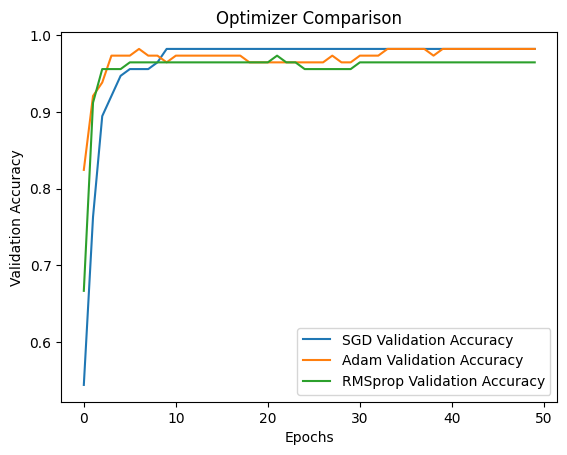

In [7]:
# Plot the training history
import matplotlib.pyplot as plt

for opt_name in optimizers.keys():
    plt.plot(history[opt_name].history['val_accuracy'], label=f'{opt_name} Validation Accuracy')

plt.title('Optimizer Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

**Considerations and Tradeoffs
When choosing an optimizer for a neural network:**

Convergence Speed: Adam generally converges faster than SGD or RMSprop.
Stability: SGD with momentum and Adam tend to be more stable than plain SGD.
Generalization: Sometimes, SGD might generalize better than adaptive methods like Adam.
Memory: Adam and RMSprop require more memory due to storing additional parameters (e.g., moment estimates).
Conclusion
Understanding and choosing the right optimizer is crucial for effective training of neural networks. While traditional methods like SGD have their strengths, modern optimizers like Adam and RMSprop offer significant improvements in convergence speed and stability. However, the choice of optimizer should be guided by the specific requirements of the task and the architecture of the neural network.